# Boston House Price——DecisionTree

此项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Housing)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

## 导入数据

In [1]:
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
# Pretty display for notebooks
# 让结果在notebook中显示
%matplotlib inline

from sklearn.model_selection import ShuffleSplit

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style()

# Load the Boston housing dataset
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## 观察数据

In [2]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
#目标：计算价值的最小值
minimum_price = np.min(prices)

#目标：计算价值的最大值
maximum_price = np.max(prices)

#目标：计算价值的平均值
mean_price = np.mean(prices)

#目标：计算价值的中值
median_price = np.median(prices)

#目标：计算价值的标准差
std_price = np.std(prices)

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## 衡量模型好坏的标准

$$R^2 = 1 - \frac{\Sigma_{i=1}^{n}(y_{i} - \hat y_{i})^2}  {\Sigma_{i=1}^{n}(y_{i} - \bar{y})^2}$$
其中$\Sigma_{i=1}^{n}(y_{i} - \hat y_{i})^2$为SSE，$\Sigma_{i=1}^{n}(y_{i} - \bar{y})^2$为SST (sum of squares for total)。
若有不够详尽或的地方，还请老师继续批评指正，我对$R^2$的证明推导理解得还不够透彻。

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

## 数据分割与重排
接下来，把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重新排序，以消除数据集中由于排序而产生的偏差。
在下面的代码中，你需要：
- 使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
- 最终分离出的子集为`X_train`,`X_test`,`y_train`,和`y_test`。

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 0)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


## 分析模型的表现
在项目的第三部分，我们来看一下几个模型针对不同的数据集在学习和测试上的表现。另外，你需要专注于一个特定的算法，用全部训练集训练时，提高它的`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。把你模型的表现画出来对于分析过程十分有益。可视化可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观的显示了随着训练数据量的增加，模型学习曲线的训练评分和测试评分的变化。注意，曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。这个模型的训练和测试部分都使用决定系数R<sup>2</sup>来评分。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

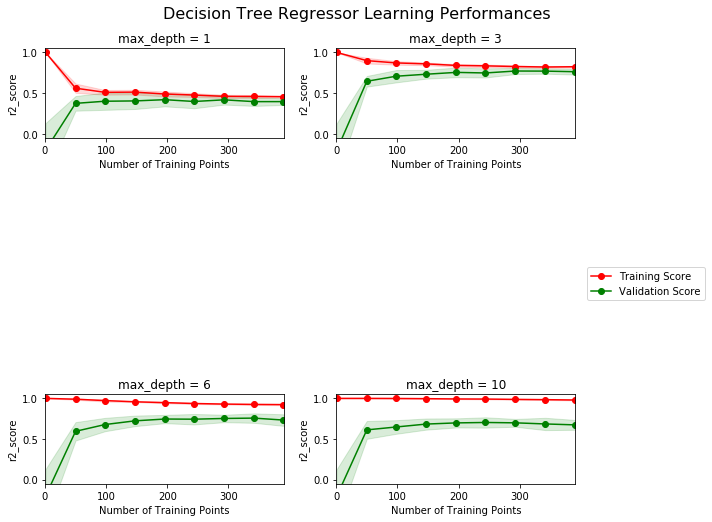

In [6]:
vs.ModelLearning(features, prices)

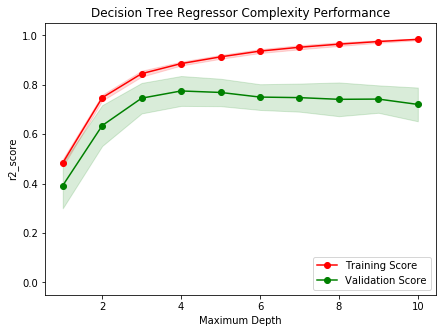

In [7]:
vs.ModelComplexity(X_train, y_train)